# Point plus extended lens simulation

This notebook shows how to use SLSim to simulate point plus extended source lens. For 

this, it uses a simple point plus extended source catalog. Catalog has skypy galaxaly 

catalog as host galaxies and fake quasars as point source.

## Simulate source and deflector population

In [1]:
import matplotlib.pyplot as plt
from astropy.cosmology import FlatLambdaCDM
from astropy.units import Quantity
from slsim.lens_pop import LensPop
from slsim.image_simulation import lens_image
import numpy as np

In [2]:
# define a cosmology
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)


# define a sky area
sky_area = Quantity(value=1, unit="deg2")


# define limits in the intrinsic deflector and source population (in addition to the
# skypy config
# file)
kwargs_deflector_cut = {"band": "g", "band_max": 23, "z_min": 0.01, "z_max": 2.5}
kwargs_source_cut = {"band": "g", "band_max": 26, "z_min": 0.1, "z_max": 5.0}

## create a point plus extended source lens population.
pes_lens_pop = LensPop(
    deflector_type="all-galaxies",
    source_type="quasar_plus_galaxies",
    kwargs_deflector_cut=kwargs_deflector_cut,
    kwargs_source_cut=kwargs_source_cut,
    variability_model="sinusoidal",
    kwargs_variability={"amp", "freq"},
    kwargs_mass2light=None,
    skypy_config=None,
    sky_area=sky_area,
    cosmo=cosmo,
)

## Select a lens at random

In [3]:
# Define a lens cut
kwargs_lens_cut = {"min_image_separation": 0.8, "max_image_separation": 10}
# Select a lens at random
pes_lens_class = pes_lens_pop.select_lens_at_random(**kwargs_lens_cut)

## Define a psf kernel and tranform matrix

In [4]:
# load your psf kernel and transform matrix
psf_kernel = np.load(
    "../..//tests/TestData/psf_kernels_for_deflector.npy"
)
transform_matrix = np.array([[0.2, 0], [0, 0.2]])

## Simulate lens image

In [5]:
# Simulate a lens image
image_lens = lens_image(
    lens_class=pes_lens_class,
    band="i",
    mag_zero_point=27,
    num_pix=64,
    psf_kernel=psf_kernel,
    transform_pix2angle=transform_matrix,
    exposure_time=30,
)

/Users/sanchez/.virtualenvs/slsim/lib/python3.12/site-packages/lenstronomy/Data/psf.py:80: UserWarning: Input PSF model has at least one negative element, which is unphysical except for a PSF of an interferometric array.
  warnings.warn(


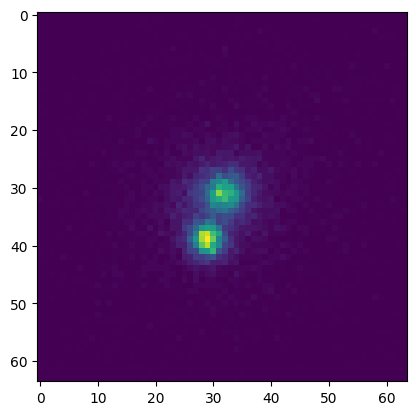

In [6]:
plt.imshow(image_lens)